In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Task here is to segregate/classify the customers on their beahaviour of purchasing goods in a supermarket 

In [4]:
## Reading the data
df=pd.read_csv('C:/Users/Kalyan/Desktop/Prodigy_Internship/Task_2/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
## removing irrelated or unusual columns
df.drop('CustomerID',axis=1,inplace=True)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
## Checking and removing null values
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
## Categorical Encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [16]:
## after preprocessing
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


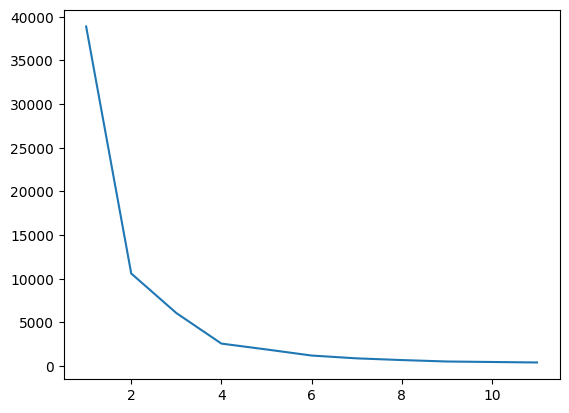

In [46]:
from sklearn.cluster import KMeans
scores=[]
for i in range(1,12):
    model_k=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model_k.fit(df.iloc[:,[0,1]])
    scores.append(model_k.inertia_)
plt.plot([i for i in range(1,12)],scores)

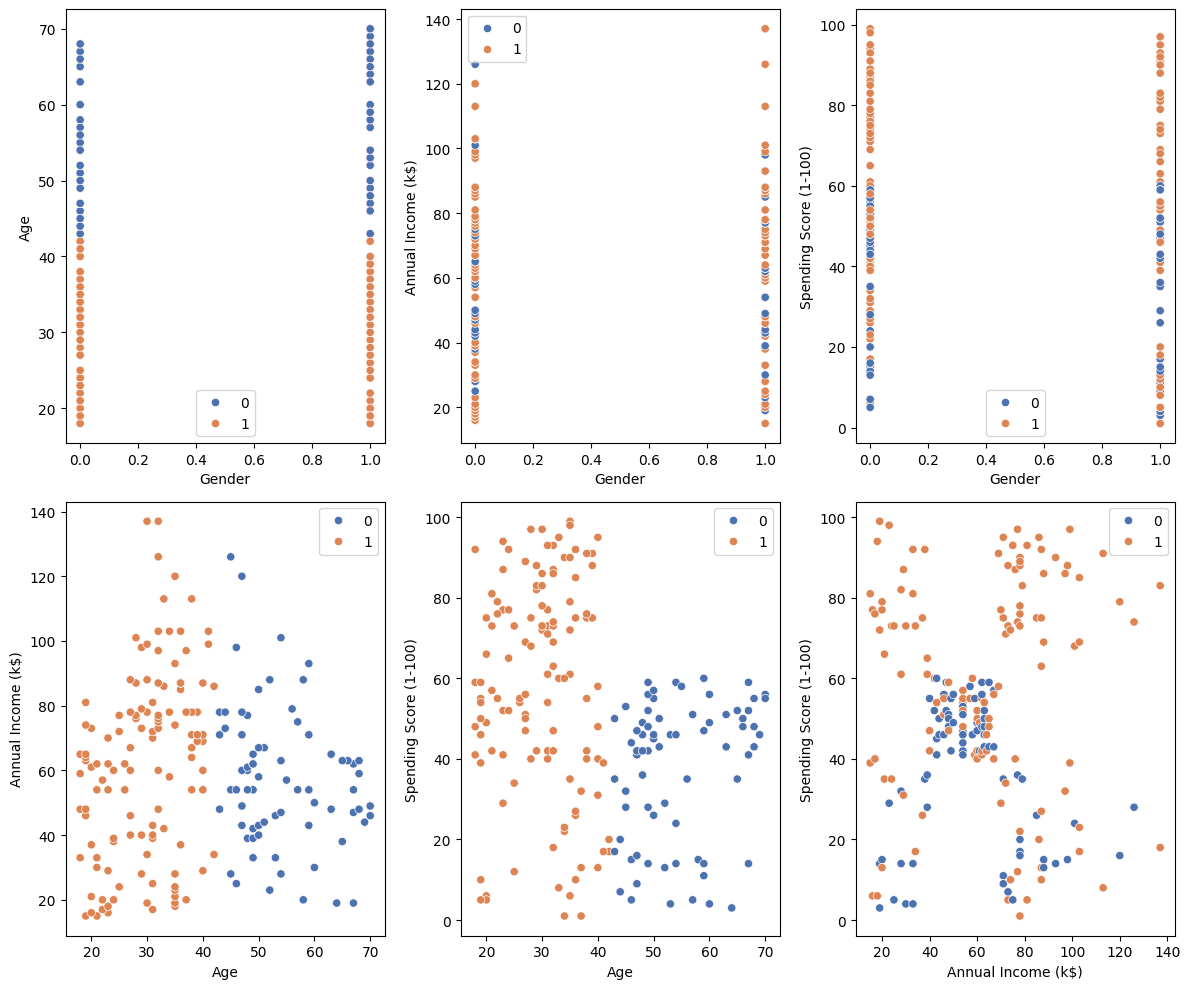

In [74]:
model=KMeans(n_clusters=2,init='k-means++',random_state=42)
labels=model.fit_predict(df.iloc[:,[0,1]])
plot(df,labels)

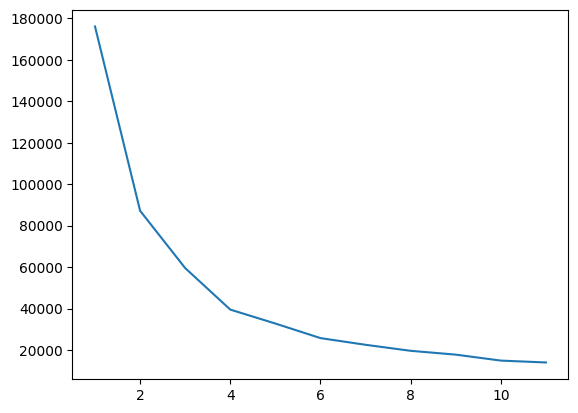

In [81]:
from sklearn.cluster import KMeans
scores=[]
for i in range(1,12):
    model_k=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model_k.fit(df.iloc[:,1:3])
    scores.append(model_k.inertia_)
plt.plot([i for i in range(1,12)],scores)

In [76]:
model=KMeans(n_clusters=3,init='k-means++',random_state=42)
labels=model.fit_predict(df.iloc[:,[0,2]])

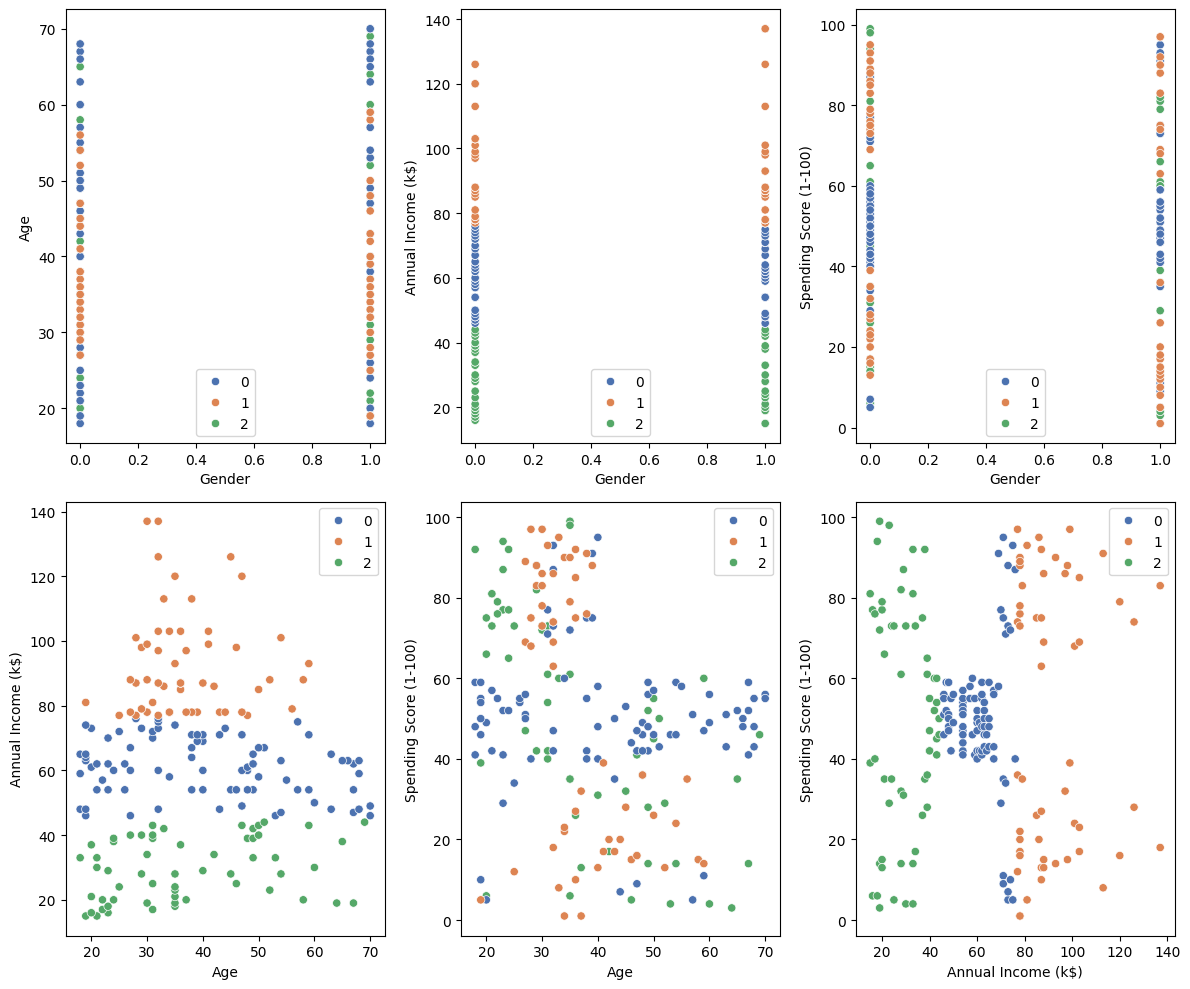

In [77]:
plot(df,labels)

In [72]:
def plot(df,lables):
    fig,axes=plt.subplots(2,3,figsize=(12,2*5))
    plt.subplots_adjust(wspace=0.6,hspace=0.3)
    sns.scatterplot(data=df,x=df.columns[0],y=df.columns[1],hue=labels,palette='deep',ax=axes[0][0])
    sns.scatterplot(data=df,x=df.columns[0],y=df.columns[2],hue=labels,palette='deep',ax=axes[0][1])
    sns.scatterplot(data=df,x=df.columns[0],y=df.columns[3],hue=labels,palette='deep',ax=axes[0][2])
    sns.scatterplot(data=df,x=df.columns[1],y=df.columns[2],hue=labels,palette='deep',ax=axes[1][0])
    sns.scatterplot(data=df,x=df.columns[1],y=df.columns[3],hue=labels,palette='deep',ax=axes[1][1])
    sns.scatterplot(data=df,x=df.columns[2],y=df.columns[3],hue=labels,palette='deep',ax=axes[1][2])
    plt.tight_layout()

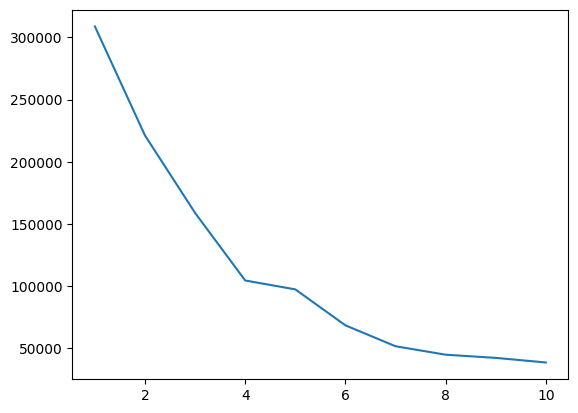

In [86]:
score=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(df)
    score.append(model.inertia_)
plt.plot([i for i in range(1,11)],score)

In [88]:
model=KMeans(n_clusters=4,init='k-means++',random_state=42)
labels=model.fit_predict(df)

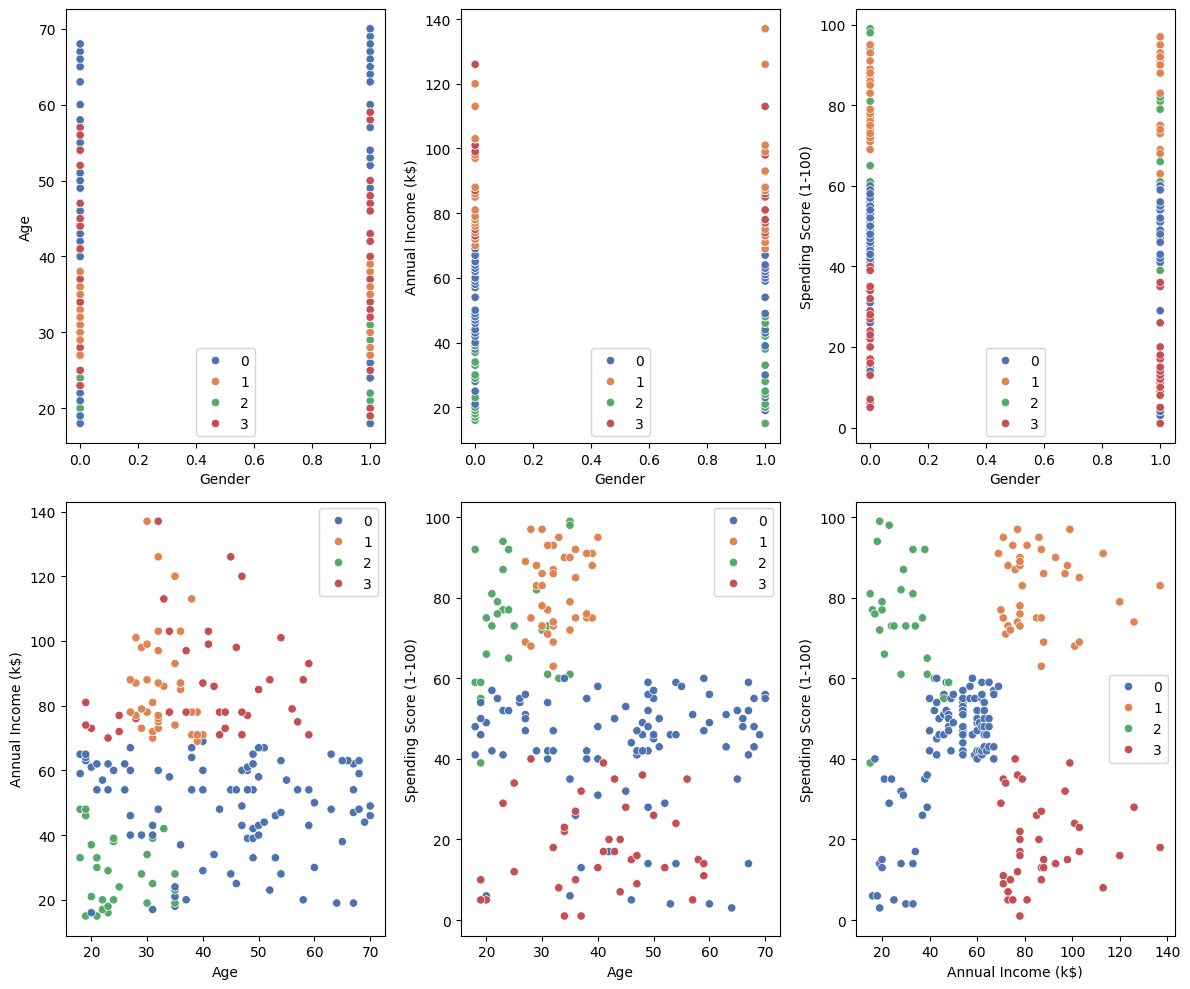

In [89]:
plot(df,labels)

##### A valid insight from the data is we can classify the customers into four groups based on the below data

In [91]:
model=KMeans(n_clusters=4,init='k-means++',random_state=42)
labels=model.fit_predict(df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

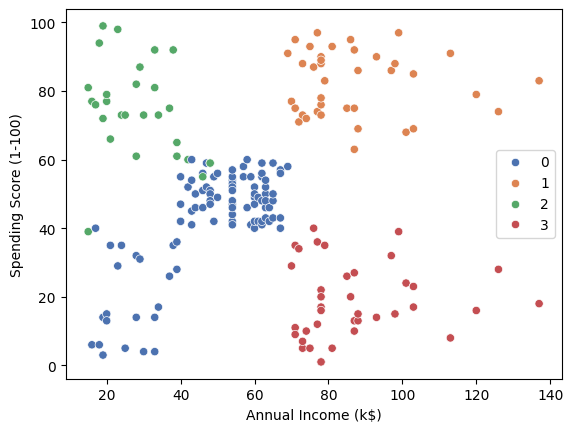

In [95]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue=labels,palette='deep')

### Observations that might be usefull for mall or supermarket
#### There are different types of customers are visiting the mall they are
- 1. Customer with low Income and low spending score (labelled with 0).
- 2. Customer with low Income and high spending score (labelled with 2).
- 3. Customer with high Income and low spending score (labelled with 3).
- 4. Customer with high Income and high spending score (labelled with 1).

In [97]:
df['label']=labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0


In [98]:
## Lets see what type of people like gender,age in each above mentioned categories.
zero_label_data=df[df.label==0]
one_label_data=df[df.label==1]
two_label_data=df[df.label==2]
three_label_data=df[df.label==3]

In [107]:
print(encoder.classes_[0])
print(encoder.classes_[1])

Female
Male


In [144]:
def describe(label_data): 
    fig,axes=plt.subplots(1,2,figsize=(18,6))
    label_data['Gender'].value_counts().plot(kind='barh',ax=axes[0])
    axes[0].set_yticks(ticks=[0,1],labels=['female','male'])
    label_data['Age'].plot(kind='hist',ax=axes[1])
    plt.show()


##### Description of zero labelled data i.e. customers with low income and low spending score

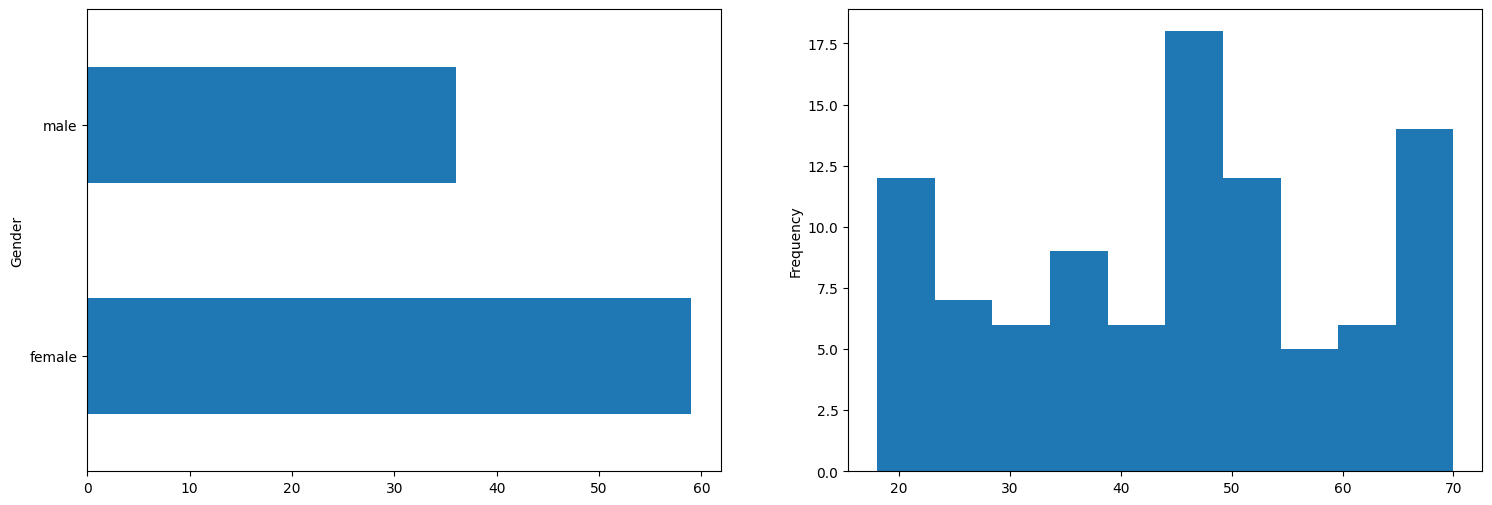

In [153]:
describe(zero_label_data)

##### Description of one labelled data i.e. customers with high income and high spending score


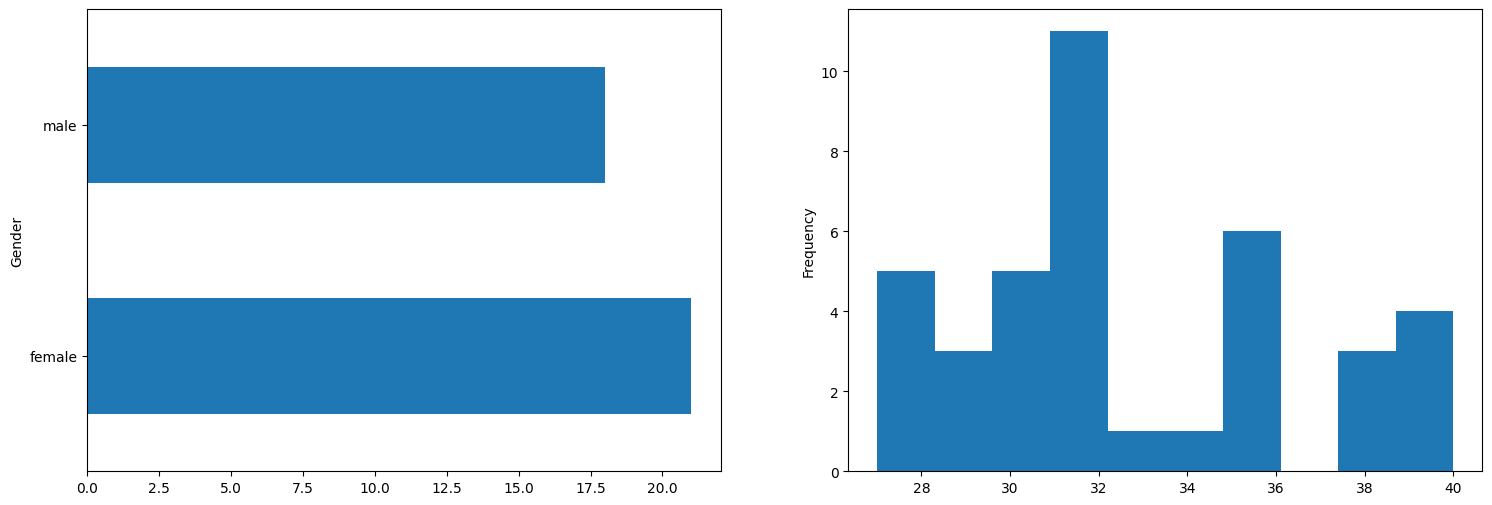

In [146]:
## Description of one labelled data i.e. customers with high income and high spending score
describe(one_label_data)

##### Description of two labelled data i.e. customers with low income and high spending score


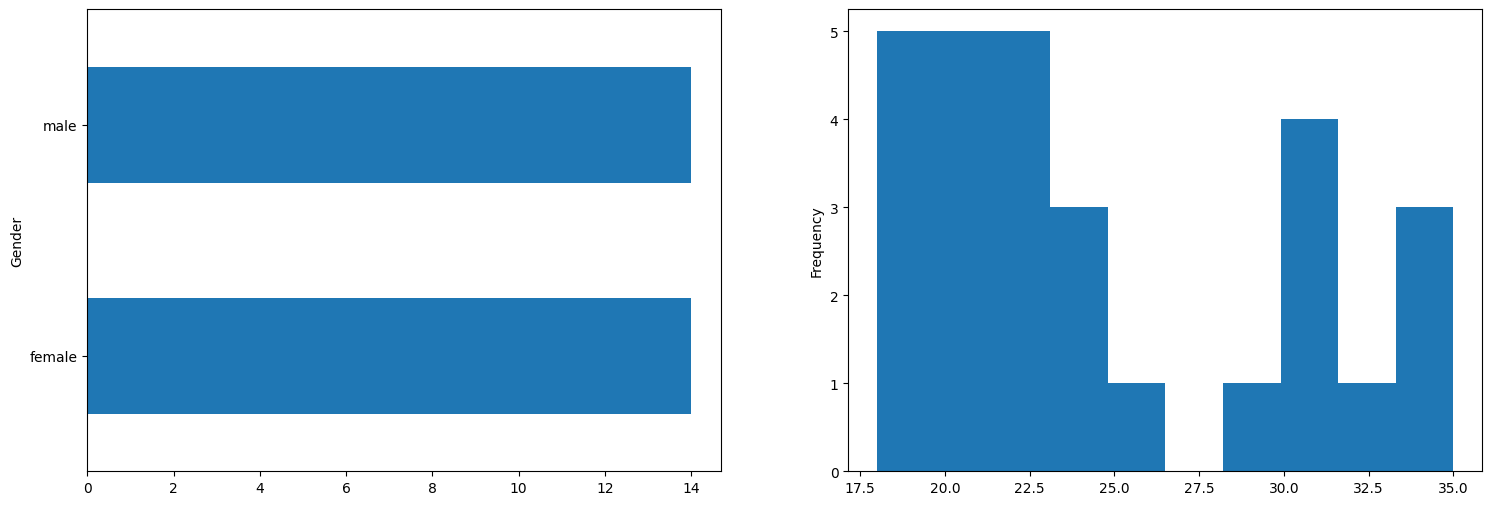

In [149]:
## Description of two labelled data i.e. customers with low income and high spending score
describe(two_label_data)

##### Description of three labelled data i.e. customers with high income and low spending score


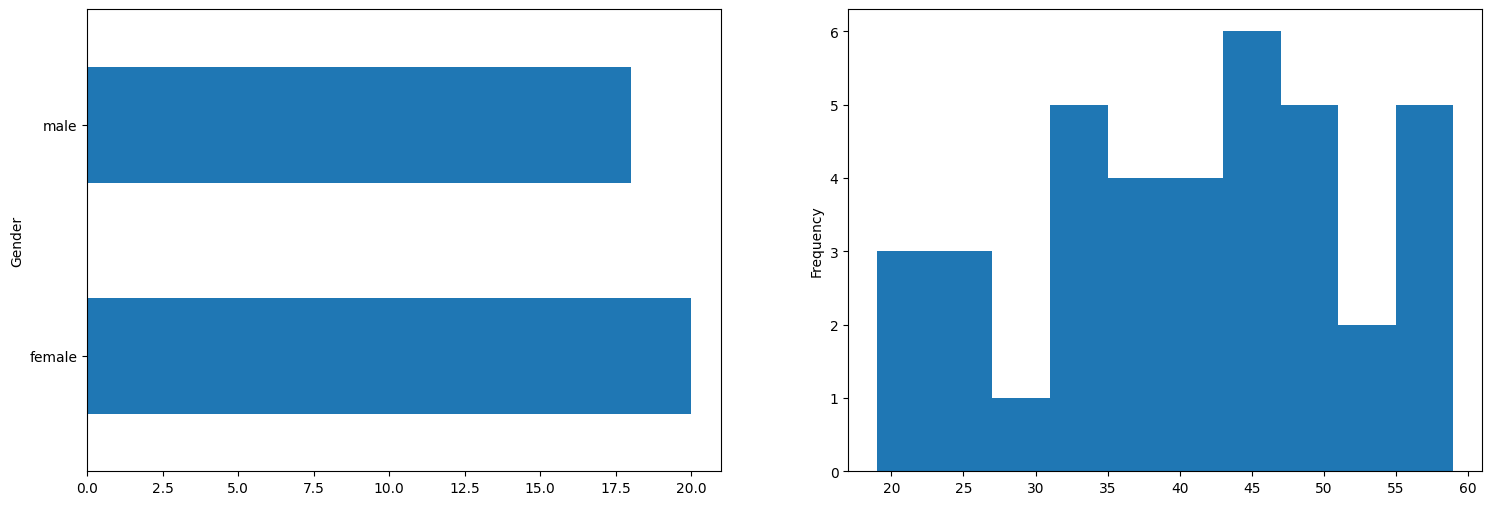

In [152]:
## Description of three labelled data i.e. customers with high income and low spending score
describe(three_label_data)